# Forecasting Time Series Data using Auto_ARIMA

In [77]:
import pmdarima as pm

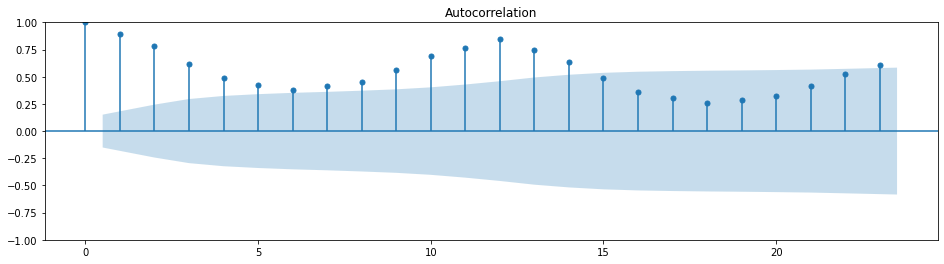

In [78]:
pm.plot_acf(milk, alpha=0.05)

In [79]:
auto_model = pm.auto_arima(milk_train, 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                          stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -448.668
Date:                            Thu, 13 Jan 2022   AIC                            903.335
Time:                                    02:54:19   BIC                            911.938
Sample:                                         0   HQIC                           906.831
                                            - 143                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2811      0.084     -3.331      0.001      -0.446      -0.116
ma.S.L12      -0.6334      0.083     -7.653      0.000      -0.796      -0.471
sigma2        55.5239      5.753      9.650      0.000      44.247      66.800
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.77
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.82
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
pm.auto_arima(life_train)

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [81]:
auto_model = pm.auto_arima(milk_train, seasonal=True, m=12, test='adf', trace=True)
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=908.834, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=951.320, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=917.481, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=903.335, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=940.547, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=905.280, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=905.265, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=917.295, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=911.816, Time=0.06 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=905.240, Time=0.15 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=905.159, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=903.959, Time=0.09 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=907.070, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -448.668
Date:                            Thu, 13 Jan 2022   AIC                            903.335
Time:                                    02:58:40   BIC                            911.938
Sample:                                         0   HQIC                           906.831
                                            - 143                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2811      0.084     -3.331      0.001      -0.446      -0.116
ma.S.L12      -0.6334      0.083     -7.653      0.000      -0.796      -0.471
sigma2        55.5239      5.753      9.650      0.000      44.247      66.800
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.77
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.82
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

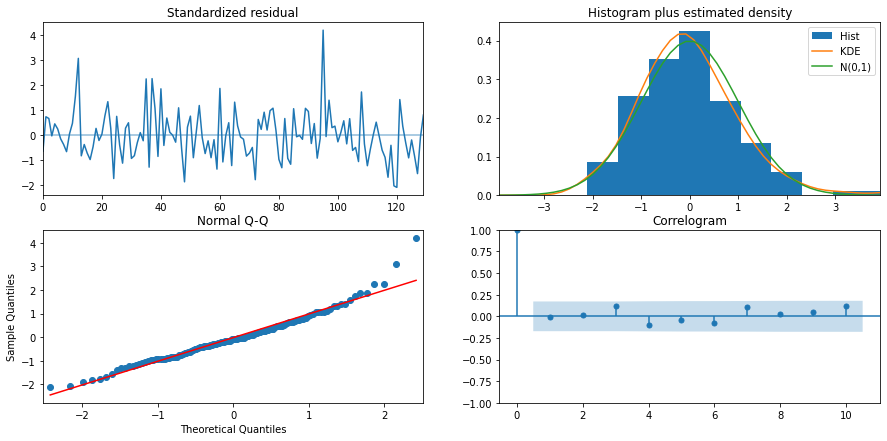

In [82]:
auto_model.plot_diagnostics(figsize=(15,7)); plt.show()

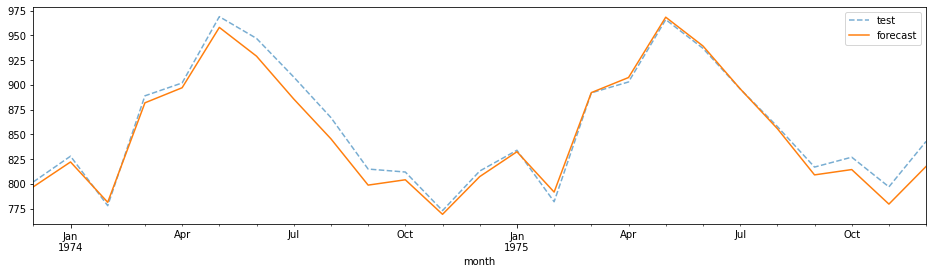

In [83]:
n = milk_test.shape[0]
index = milk_test.index
milk_test.plot(style='--', alpha=0.6)
pd.Series(auto_model.predict(n_periods=n), 
          index=index).plot(style='-')
plt.legend(['test', 'forecast']); plt.show()

In [84]:
n = milk_test.shape[0]
mape_m = mape(milk_test, model.forecast(n))
mape_auto = mape(milk_test, auto_model.predict(n))
rmse_m = rmse(milk_test.values.ravel(), model.forecast(n))
rmse_auto = rmse(milk_test.values.ravel(), auto_model.predict(n))
print(f'''
MAPE: manual = {mape_m}, auto = {mape_auto}
RMSE: manual = {rmse_m}, auto = {rmse_auto}
AIC : manual = {model.aic}, auto = {auto_model.aic()}
''')


MAPE: manual = 0.010217954312666575, auto = 0.010217954312666575
RMSE: manual = 11.318041057776615, auto = 11.318041057776615
AIC : manual = 903.3352377585529, auto = 903.3352377585529



### There is more

In [161]:
from pmdarima.arima.stationarity import ADFTest, KPSSTest, PPTest

adf_test, kpss_test, pp_test = ADFTest(), KPSSTest(), PPTest()

In [163]:
milk_dif_1 = milk.diff(1).dropna()

print(adf_test.should_diff(milk_dif_1))
print(kpss_test.should_diff(milk_dif_1))
print(pp_test.should_diff(milk_dif_1))

(0.01, False)
(0.1, False)
(0.01, False)


In [164]:
from pmdarima.arima.utils import ndiffs, nsdiffs

# ADF test:
n_adf = ndiffs(milk, test='adf') 
# KPSS test (auto_arima default):
n_kpss = ndiffs(milk, test='kpss') 
# PP test:
n_pp = ndiffs(milk, test='pp')  

In [165]:
print(n_adf, n_kpss, n_pp)

0 1 0


In [166]:
# Canova-Hansen test
n_ch = nsdiffs(milk, test='ocsb', m=10, max_D=1) 
# OCSB test
n_ocsb = nsdiffs(milk, test='ch' , m=10, max_D=12,) 


In [167]:
print(n_ch, n_ocsb)

0 0


In [95]:
model = pm.auto_arima(milk, 
                      d=1,
                      start_p=0, max_p=2,
                      start_q=0, max_q=2,
                      seasonal=True,
                      m=12,
                      D=1,
                      start_P=0, max_P=2,
                      start_Q=0, max_Q=2,
                      information_criterion='aic',
                      stepwise=False,
                      out_of_sample_siz=25,
                      score='mse',
                      trace=True)
                    

print(model.summary())

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1119.969, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1072.280, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1074.086, Time=0.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1089.113, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1074.131, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1080.886, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1075.400, Time=0.35 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1114.995, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1066.296, Time=0.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1067.976, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1082.123, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.030, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1

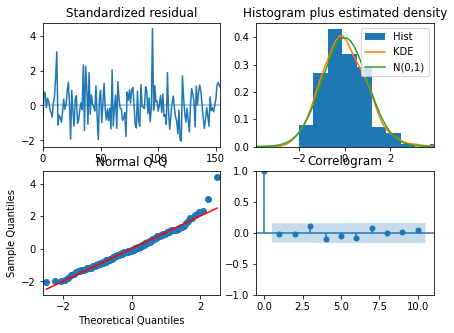

In [96]:
model.plot_diagnostics(figsize=(7,5));

# Forecasting Multivariate Time Series Data using VAR

In [168]:
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

In [169]:
start = "01-01-1980"
end = "09-30-2021"

fedfund_df = web.FredReader(symbols=["FEDFUNDS"], 
                            start=start, end=end).read()
cpi_df = web.FredReader(symbols=["CPALTT01USM657N"], 
                        start=start, end=end).read()
unemp_df = web.FredReader(symbols=["unrate"], 
                          start=start, end=end).read()

In [170]:
fedfund_df.head()

,FEDFUNDS
DATE,
1980-01-01,13.82
1980-02-01,14.13
1980-03-01,17.19
1980-04-01,17.61
1980-05-01,10.98


In [171]:
fedfund_df.shape

(501, 1)

In [172]:
# unemp_df = unemp_df.resample('QS').first()
unemp_df.head()

,unrate
DATE,
1980-01-01,6.3
1980-02-01,6.3
1980-03-01,6.3
1980-04-01,6.9
1980-05-01,7.5


In [173]:
unemp_df.shape

(501, 1)

In [174]:
cpi_df.head()

,CPALTT01USM657N
DATE,
1980-01-01,1.434159
1980-02-01,1.413882
1980-03-01,1.520913
1980-04-01,1.123596
1980-05-01,0.987654


In [105]:
cpi_df.shape

(501, 1)

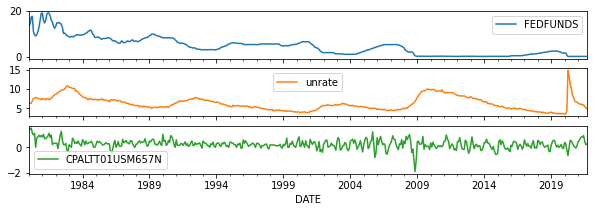

In [175]:
df_mul = pd.concat([fedfund_df, unemp_df, cpi_df], join='inner', axis=1)
df_mul.plot(subplots=True); plt.show()

In [181]:
df_mul_scaled = df_mul.copy()
for column in df_mul_scaled.columns:
    d = df_mul_scaled[column]
    df_mul_scaled[column] = ((d - d.min()) / (d.max() - d.min()))

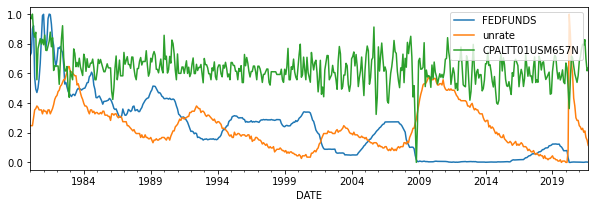

In [184]:
df_mul_scaled.plot(); plt.show()

In [185]:
check_stationarity(df_mul_scaled['FEDFUNDS'])
check_stationarity(df_mul_scaled['unrate'])
check_stationarity(df_mul_scaled['CPALTT01USM657N'])

'c'	 Stationary	 p-value:0.00010565171095316011 	 lags:16
'c'	 Stationary	 p-value:0.02450232311267524 	 lags:2
'c'	 Stationary	 p-value:3.9176569302120175e-05 	 lags:12


('Stationary', 3.9176569302120175e-05)

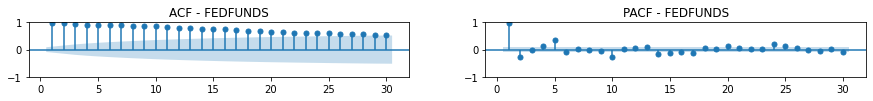

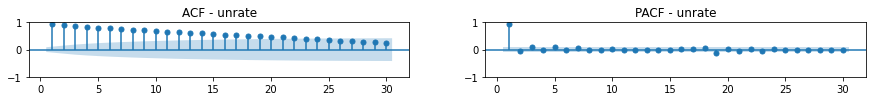

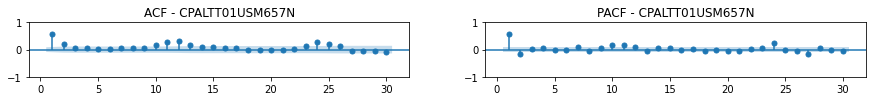

In [186]:
for col in df_mul_scaled.columns:
    fig, ax = plt.subplots(1,2, figsize=(15,1))
    plot_acf(df_mul_scaled[col], zero=False, 
             lags=30, ax=ax[0], title=f'ACF - {col}')
    plot_pacf(df_mul_scaled[col], zero=False, 
              lags=30, ax=ax[1], title=f'PACF - {col}');plt.show()

In [111]:
# gc_res = grangercausalitytests(df_mul_st, 5)

In [187]:
test_split = 0.20
train, test = split_data(df_mul_scaled, test_split)

train: 401 , test: 100


In [188]:
model = VAR(endog=train)
res = model.select_order(20, trend="c")
res.summary()

,AIC,BIC,FPE,HQIC
0,-12.06,-12.03,5.798e-06,-12.05
1,-21.64,-21.51,4.015e-10,-21.59
2,-21.98,-21.76*,2.857e-10,-21.89
3,-21.99,-21.68,2.828e-10,-21.86
4,-22.03,-21.63,2.695e-10,-21.87
5,-22.10,-21.60,2.530e-10,-21.90*
6,-22.12,-21.53,2.486e-10,-21.88
7,-22.11,-21.43,2.497e-10,-21.84
8,-22.12,-21.35,2.467e-10,-21.82
9,-22.12,-21.25,2.483e-10,-21.77


In [189]:
print(f'AIC: {res.aic} , BIC: {res.bic}, HQ: {res.hqic}, FPE: {res.fpe}')

AIC: 14 , BIC: 2, HQ: 5, FPE: 14


In [190]:
results = model.fit(maxlags=14, ic='aic')

In [191]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Dec, 2021
Time:                     20:56:22
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -20.6681
Nobs:                     387.000    HQIC:                  -21.4643
Log likelihood:           2736.20    FPE:                2.83227e-10
AIC:                     -21.9875    Det(Omega_mle):     2.06472e-10
--------------------------------------------------------------------
Results for equation FEDFUNDS
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.005750         0.017729            0.324           0.746
L1.FEDFUNDS                 1.436153         0.051297           27.997           0.000
L1.unrate                  -0.136

In [117]:
results.params

,FEDFUNDS,unrate,CPALTT01USM657N
const,-0.004781,0.000079,-0.017062
L1.FEDFUNDS,1.436153,-0.103817,1.675408
L1.unrate,-0.099621,0.938557,-0.035573
L1.CPALTT01USM657N,-0.006023,0.001464,0.472408
L2.FEDFUNDS,-0.498854,0.079408,-1.889325
L2.unrate,0.070721,0.105638,-0.512281
L2.CPALTT01USM657N,-0.001151,0.002522,-0.190410
L3.FEDFUNDS,0.121622,-0.128791,-0.077964
L3.unrate,-0.021961,0.112766,-0.519136
L3.CPALTT01USM657N,-0.003108,-0.001423,-0.098243


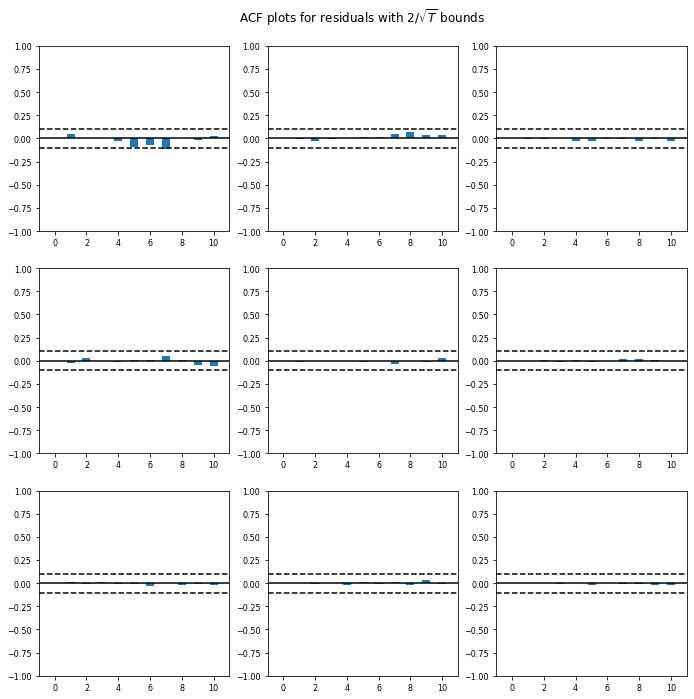

In [192]:
results.plot_acorr();

In [193]:
lag_order = results.k_ar
lag_order

14

In [194]:
n = test.shape[0]
forecast = results.forecast(df_mul.values[-lag_order:], n)

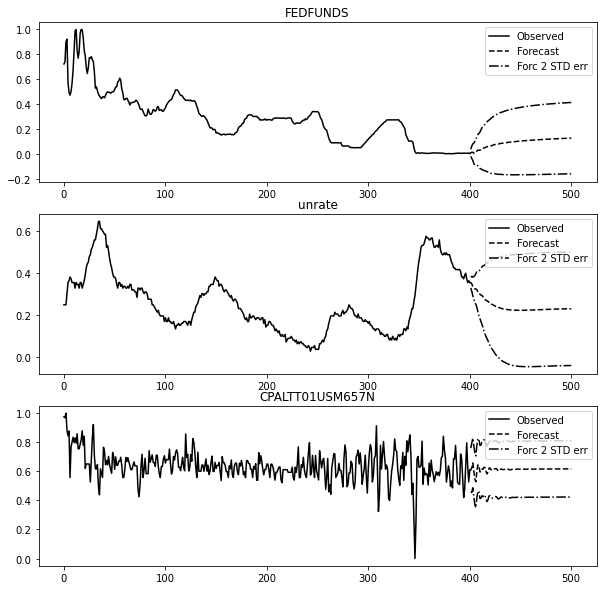

In [195]:
results.plot_forecast(n);

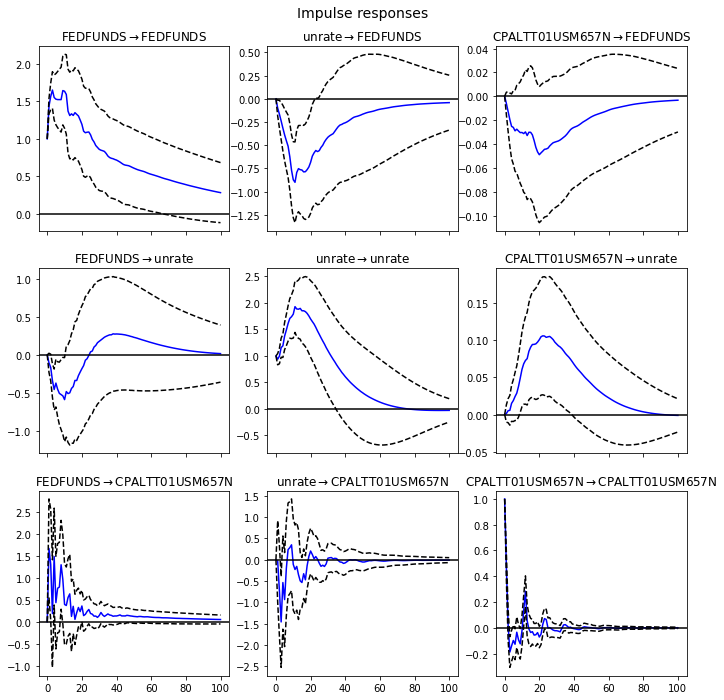

In [122]:
irf = results.irf(n)
irf.plot(orth=False);plt.show()

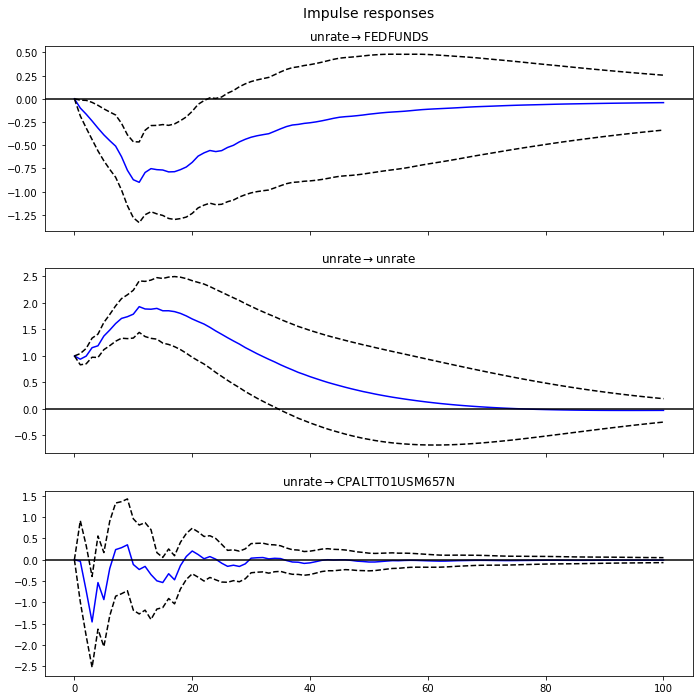

In [123]:
irf.plot(impulse='unrate');plt.show()

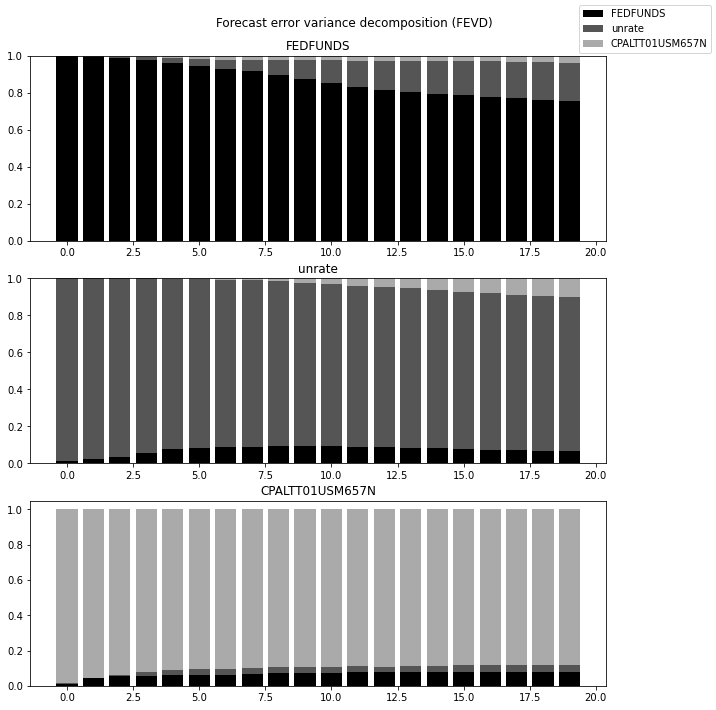

In [196]:
results.fevd(20).plot();plt.show()

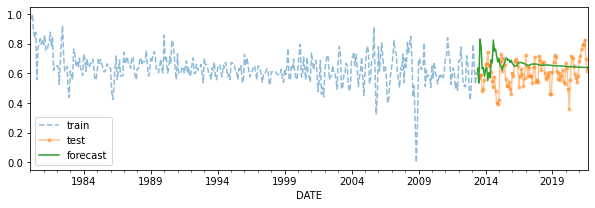

In [197]:
train['CPALTT01USM657N'].plot(style='--',alpha=0.5)
test['CPALTT01USM657N'].plot(style='.-', alpha=0.45)
pd.Series(forecast[ :, 2], index=test.index).plot()
plt.legend(['train', 'test', 'forecast'])

### There is more

In [249]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [250]:
res = coint_johansen(df_mul_st, -1, 5)

In [251]:
res.lr1

array([1.06803856e+01, 4.92500563e-04])

In [252]:
res.cvt

array([[10.4741, 12.3212, 16.364 ],
       [ 2.9762,  4.1296,  6.9406]])

# Forecasting Time Series Data using Prophet

In [76]:
from prophet import Prophet

In [77]:
milk_p = milk.reset_index()
life_p = life.reset_index()

In [78]:
cols = ['ds', 'y']
milk_p.columns = cols
life_p.columns = cols

In [79]:
test_split = 0.15
train_milk, test_milk = split_data(milk_p, test_split)
train_life, test_life = split_data(life_p, test_split)

train: 143 , test: 25
train: 50 , test: 9


In [80]:
m_milk = Prophet(seasonality_mode='multiplicative').fit(train_milk)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.63781
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       562.843     0.0483286       651.484           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       566.489   0.000142385        111.47   1.637e-06       0.001      253  LS failed, Hessian reset 
     199       566.761   0.000476663       82.0237           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       568.034   0.000281645       236.354   2.178e-06       0.001      450  LS failed, Hessian reset 
     299       568.124   0.000858039       210.683           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       568.265   0.000143229       203.491   1.888e-06       0.001      501  LS failed, Hessian rese

In [81]:
m_life = Prophet(yearly_seasonality=True ).fit(train_life)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -60.1104
Iteration  1. Log joint probability =    158.805. Improved by 218.916.
Iteration  2. Log joint probability =    195.564. Improved by 36.7583.
Iteration  3. Log joint probability =    226.581. Improved by 31.0172.
Iteration  4. Log joint probability =     254.17. Improved by 27.5894.
Iteration  5. Log joint probability =    271.227. Improved by 17.0563.
Iteration  6. Log joint probability =    271.337. Improved by 0.110207.
Iteration  7. Log joint probability =    271.993. Improved by 0.656614.
Iteration  8. Log joint probability =    272.252. Improved by 0.25908.
Iteration  9. Log joint probability =    272.559. Improved by 0.306913.
Iteration 10. Log joint probability =    272.738. Improved by 0.17876.
Iteration 11. Log joint probability =    273.269. Improved by 0.531248.
Iteration 12. Log joint probability =    273.812. Improved by 0.542823.
Iteration 13. Log joint probability =    273.974. Improved by 0.162228.
Iteration 14. Log joint proba

In [82]:
print(f'''
{test_milk.shape}
{test_life.shape}
''')

4.491. Improved by 6.66535e-06.
Iteration 69. Log joint probability =    274.491. Improved by 1.34716e-06.
Iteration 70. Log joint probability =    274.491. Improved by 1.24225e-07.
Iteration 71. Log joint probability =    274.491. Improved by 1.33297e-06.
Iteration 72. Log joint probability =    274.491. Improved by 3.94509e-06.
Iteration 73. Log joint probability =    274.491. Improved by 2.83632e-06.
Iteration 74. Log joint probability =    274.491. Improved by 9.51381e-07.
Iteration 75. Log joint probability =    274.491. Improved by 8.64375e-07.
Iteration 76. Log joint probability =    274.491. Improved by 2.87762e-07.
Iteration 77. Log joint probability =    274.491. Improved by 4.63786e-07.
Iteration 78. Log joint probability =    274.491. Improved by 3.65226e-07.
Iteration 79. Log joint probability =    274.491. Improved by 2.78752e-07.
Iteration 80. Log joint probability =    274.491. Improved by 2.45827e-07.
Iteration 81. Log joint probability =    274.491. Improved by 1.0553

In [83]:
milk_future = m_milk.make_future_dataframe(25, freq='MS')
life_future = m_life.make_future_dataframe(9, freq='AS')

In [84]:
train_milk.shape

(143, 2)

In [85]:
milk_future.shape

(168, 1)

In [86]:
forecast_milk = m_milk.predict(milk_future)
forecast_life = m_life.predict(life_future)

In [87]:
forecast_life.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [88]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']

In [89]:
forecast_life[cols].tail()

,ds,yhat,yhat_lower,yhat_upper
54,2014-01-01,83.026051,82.759700,83.277826
55,2015-01-01,83.264176,82.996703,83.535324
56,2016-01-01,83.520437,83.233735,83.770795
57,2017-01-01,83.768923,83.476041,84.037139
58,2018-01-01,83.997388,83.725273,84.264420


In [90]:
forecast_milk[cols].tail()

,ds,yhat,yhat_lower,yhat_upper
163,1975-08-01,855.345470,838.406472,872.115123
164,1975-09-01,807.070057,790.796007,824.297921
165,1975-10-01,813.142784,795.719359,829.684203
166,1975-11-01,776.637810,760.933009,795.234480
167,1975-12-01,817.228013,798.393327,836.753056


In [91]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']
data = [('Milk Production', test_milk, m_milk), 
        ('Life Expectancy', test_life, m_life)]

### Forecasting with Prophet Example

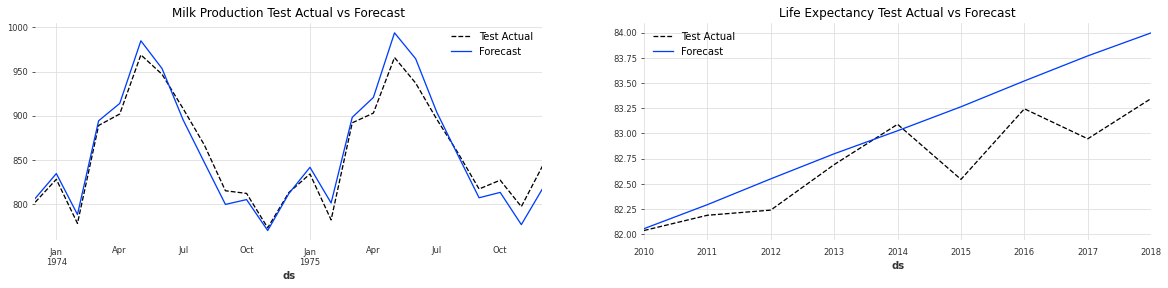

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
for i, (name, df, m) in enumerate(data):
    predicted = m.predict(df)[cols]
    df.plot(kind='line',x='ds', y='y', label='Test Actual', ax=ax[i], style='--')
    predicted.plot(kind='line',x='ds',y='yhat', label='Forecast', ax=ax[i])
    ax[i].title.set_text(f'{name} Test Actual vs Forecast')
plt.show()

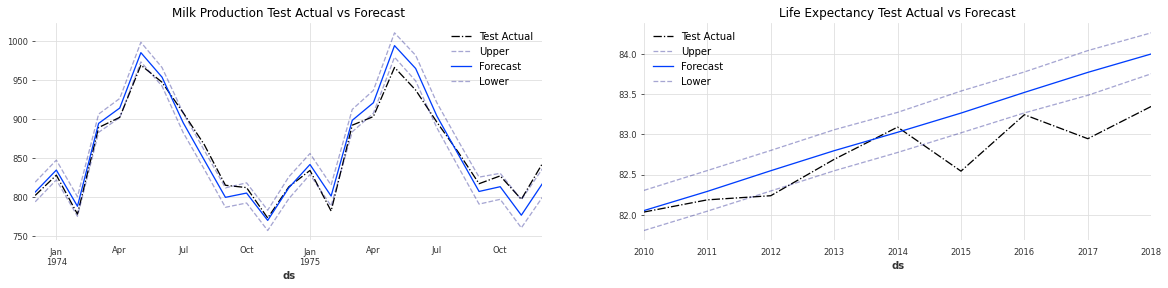

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
for i, (name, df, m) in enumerate(data):
    predicted = m.predict(df)[cols]
    df.plot(kind='line',x='ds', y='y', label='Test Actual', ax=ax[i], style='-.')
    predicted.plot(kind='line',x='ds',y='yhat_upper', label='Upper', ax=ax[i], color='navy', style='--', alpha=0.35)
    predicted.plot(kind='line',x='ds',y='yhat', label='Forecast', ax=ax[i])
    predicted.plot(kind='line',x='ds',y='yhat_lower', label='Lower', ax=ax[i], color='navy', style='--', alpha=0.35)
    ax[i].title.set_text(f'{name} Test Actual vs Forecast')
plt.show()

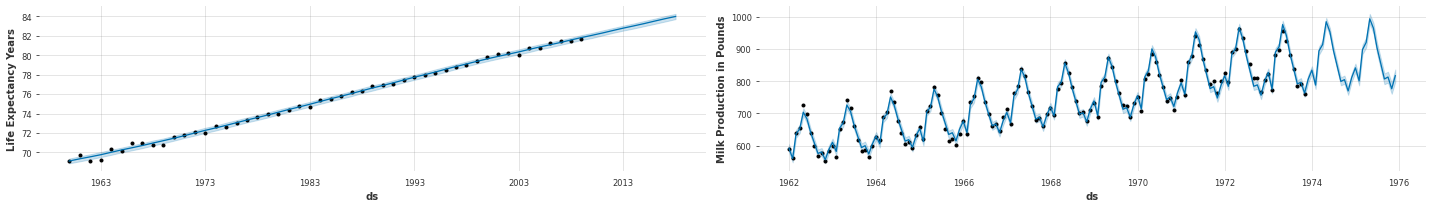

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(20,3))
m_life.plot(forecast_life, ax=ax[0], ylabel='Life Expectancy Years')
m_milk.plot(forecast_milk, ax=ax[1], ylabel='Milk Production in Pounds')
plt.show()

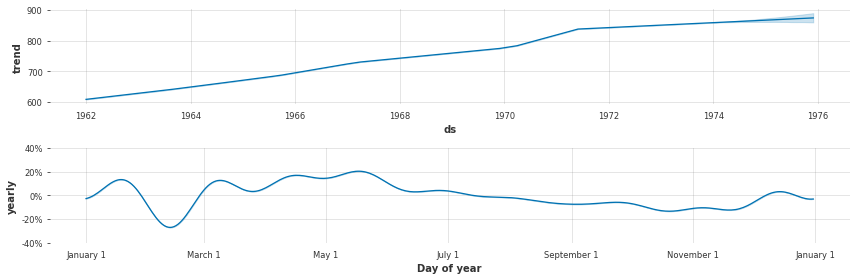

In [98]:
m_milk.plot_components(forecast_milk, figsize=(12,4)); plt.show()

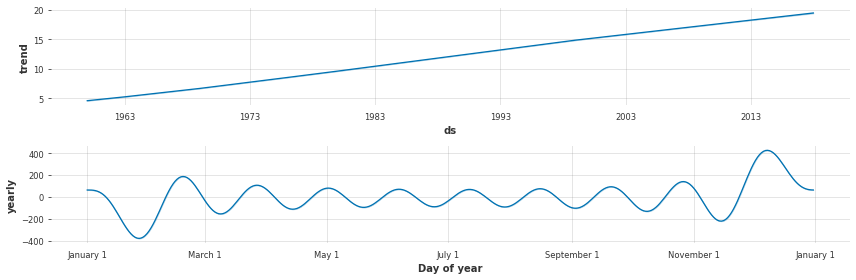

In [99]:
m_life.plot_components(forecast_life, figsize=(12,4)); plt.show()

# Forecasting Volatility in Financial Time Series Data with GARCH


In [349]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

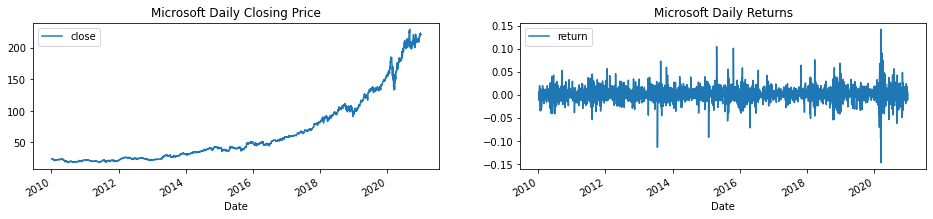

In [407]:
msft_return = msft.pct_change().dropna()
msft_return.columns = ['return']

fig, ax = plt.subplots(1,2, figsize=(16,3))
msft.plot(ax=ax[0])
msft_return.plot(ax=ax[1])
ax[0].title.set_text('Microsoft Daily Closing Price')
ax[1].title.set_text('Microsoft Daily Returns')


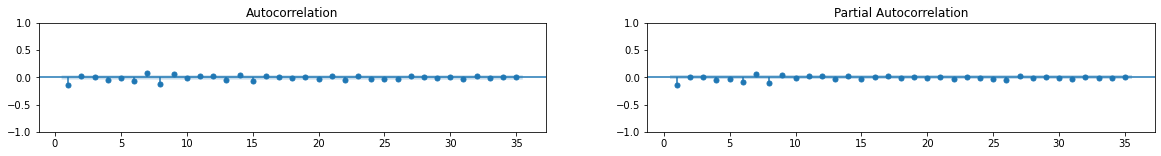

In [477]:
fig, ax = plt.subplots(1,2, figsize=(20,2))
plot_acf(msft_return, zero=False, ax=ax[0])
plot_pacf(msft_return, zero=False, ax=ax[1]); plt.show()

In [361]:
volatility = msft_return.std()
volatility

close    0.015993
dtype: float64

In [362]:
annualized = np.sqrt(252)*volatility
annualized

close    0.253888
dtype: float64

<AxesSubplot:xlabel='Date'>

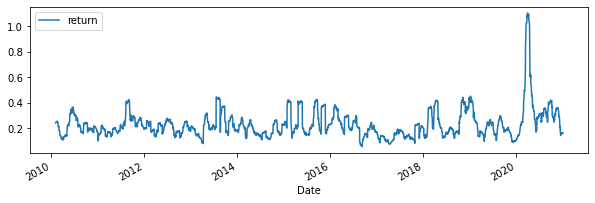

In [451]:
msft_return.rolling(22).apply(lambda x: x.std()*np.sqrt(252)).plot()

In [463]:
train, test = split_data(msft_return, 0.10)

train: 2491 , test: 277


In [464]:
msft_gm = arch_model(train).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0009688463452016e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2630851955.044345
Iteration:      3,   Func. Count:     31,   Neg. LLF: 85543857193550.4
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7105.53750115863
            Iterations: 3
            Function evaluations: 41
            Gradient evaluations: 3


$\omega$, $\alpha$ and $\beta$ are estimated by Maximum Likelihood Method

In [465]:
msft_gm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7105.54
Distribution:                  Normal   AIC:                          -14203.1
Method:            Maximum Likelihood   BIC:                          -14179.8
                                        No. Observations:                 2491
Date:                Tue, Dec 21 2021   Df Residuals:                     2490
Time:                        22:39:39   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0947e-03  2.689e-04      4.071  4.672e-05 [5.677e-04,1.622e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0636e-05  5.076e-12  4.066e+06      0.000 [2.064e-05,2.064e-05]
alpha[1]       0.1000  2.960e-02      3.378  7.294e-04   [4.198e-02,  0.158]
beta[1]        0.8000  2.868e-02     27.893 3.210e-171     [  0.744,  0.856]
============================================================================

Covariance estimator: robust
"""

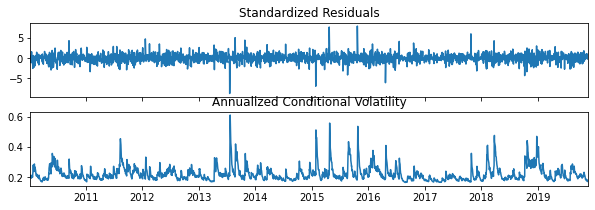

In [466]:
msft_gm.plot(annualize='D');

<AxesSubplot:>

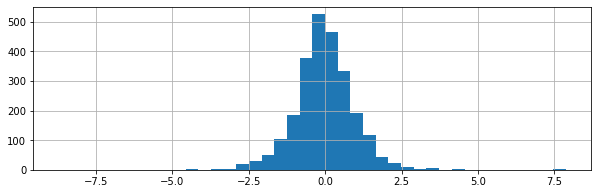

In [529]:
msft_gm.std_resid.hist(bins=40)

In [546]:
msft_vol_forecast = msft_gm.forecast(reindex=False)
print(msft_vol_forecast.variance)

                 h.1
Date                
2019-11-25  0.000121


In [552]:
msft_vol_forecast = msft_gm.forecast(horizon=test.shape[0], 
                                     reindpip install --upgrade tsmoothieex=False)
msft_vol_forecast.variance.shape

(1, 277)

In [561]:
melted_df = pd.melt(msft_vol_forecast.variance)
melted_df.index = test.index
print(melted_df.head())

           variable     value
Date                         
2019-11-26    h.001  0.000121
2019-11-27    h.002  0.000130
2019-11-29    h.003  0.000137
2019-12-02    h.004  0.000144
2019-12-03    h.005  0.000150


<AxesSubplot:xlabel='Date'>

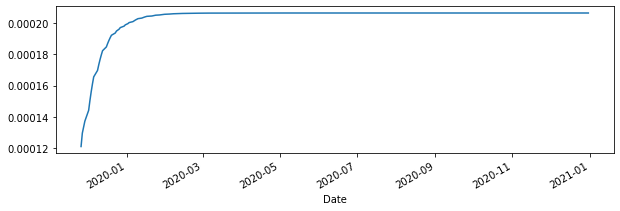

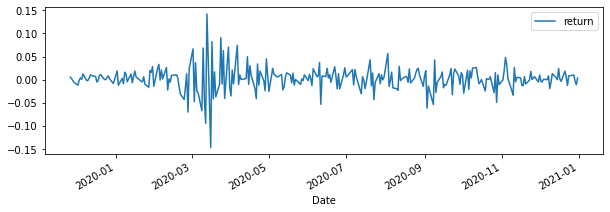

In [562]:
forecast = msft_vol_forecast.variance[-1:].values.ravel()
pd.Series(forecast, index=test.index).plot()
test.plot()

# Forecasting Time Series Data using Kalman Filter Algorithm

In [32]:
from darts import TimeSeries
from darts.models import KalmanFilter, FFT, ExponentialSmoothing, AutoARIMA

Importing plotly failed. Interactive plots will not work.


In [35]:
milk_model = ExponentialSmoothing(seasonal_periods=12)
milk_ts = TimeSeries.from_dataframe(milk.reset_index(), 
                                    time_col='month', value_cols='production', freq='MS')

In [101]:
milk.shape

(168, 1)

In [110]:
test_split = 0.15
l = len(milk)
t_idx = l - round(l*test_split)
milk_train = milk_ts.diff()[ : t_idx]
milk_test = milk_ts.diff()[t_idx : ]
# milk_train, milk_test = split_data(milk_ts.diff(), p)

In [111]:
milk_model.fit(milk_train)
milk_pred = milk_model.predict(len(milk_test), num_samples=1000)

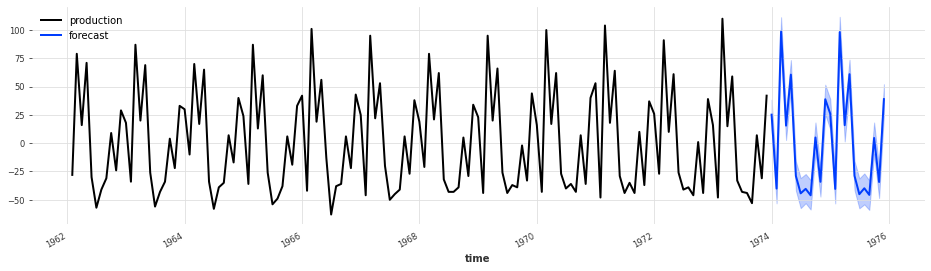

In [112]:
milk_train.plot()
milk_pred.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

In [116]:
milk_filtered = KalmanFilter().filter(milk_ts.diff())
milk_model_filtered = ExponentialSmoothing(seasonal_periods=12)

p = 0.15
# milk_train_filtered, milk_test_filtered = split_data(milk_filtered, p)
milk_train_filtered = milk_filtered[ : t_idx]
milk_test_filtered = milk_filtered[t_idx : ]

In [117]:
milk_model_filtered.fit(milk_train_filtered)
milk_pred_filtered = milk_model_filtered.predict(len(milk_test), num_samples=1000)

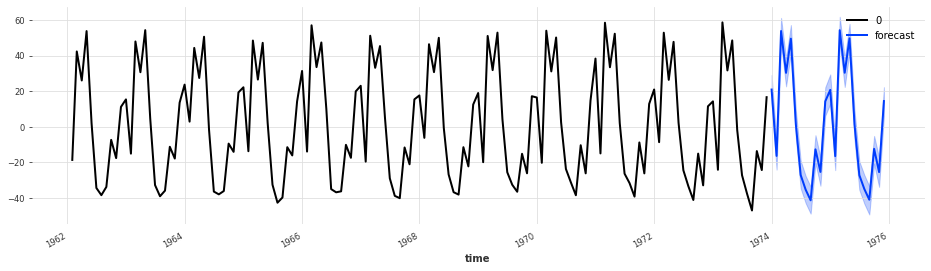

In [118]:
milk_train_filtered.plot()
milk_pred_filtered.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

# Forecasting Time Series with Multiple Seasonal Components using TBATS

In [13]:
from sktime.forecasting.tbats import TBATS

In [14]:
web = Path('../../datasets/Ch9/web_traffic.csv')
weather = Path('../../datasets/Ch9/weather.csv')
elec = Path('../../datasets/Ch9/vic_elec.csv')

In [15]:
electdemand = pd.read_csv(elec, 
                          index_col='Time', 
                          parse_dates=True,
                         usecols=['Time', 'Demand', 'Temperature'])

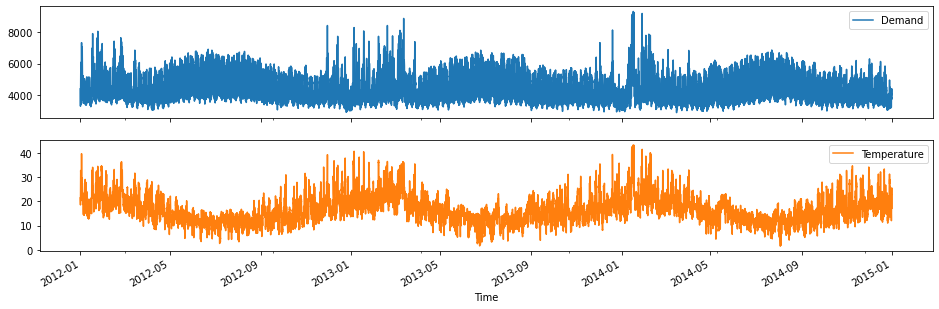

In [16]:
electdemand.plot(subplots=True,figsize=(16, 5)); plt.show()

In [17]:
elect2014 = electdemand['Demand'].loc['2014':]

In [21]:
elect2014 = elect2014.sort_index()

In [45]:
train, test = split_data(elect2014, 0.75)

train: 4380 , test: 13140


In [23]:
model = TBATS(sp=[14, 30.5], n_jobs=1, use_box_cox=False, use_trend=False, use_damped_trend=False)

In [46]:
model = TBATS()

In [47]:
model.fit(train)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=None, use_arma_errors=True,
      use_box_cox=None, use_damped_trend=None, use_trend=None)

In [52]:
model.predict(fh=[1,2,3])

ValueError: Must supply freq for datetime value

In [39]:
test.index[0:3].values.tolist()

[1407452400000000000, 1407454200000000000, 1407456000000000000]

In [48]:
model.check_is_fitted()

In [49]:
model.get_fitted_params()

{'a': None, 'i': None, 'c': None}

In [50]:
model.get_test_params()

ModuleNotFoundError: No module named 'pyod'